In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch 

def make_figs_individual(self, input_dict, save_folder, show=False):
    font = {'family': 'serif', 'weight': 'normal', 'size': 16}
    matplotlib.rc('font', **font)
    #Indivitual models
    for id in input_dict.keys():
        lowres_psnr, pred_psnr = input_dict[id]
        fig = plt.figure(figsize=(12, 9))
        sns.histplot(lowres_psnr.cpu().detach(),
                        kde=True,
                        color='blue',
                        legend=True,
                        label="lowres")
        sns.histplot(pred_psnr.cpu().detach(),
                        kde=True,
                        color='red',
                        legend=True,
                        label="pred")
        fig.legend()
        plt.savefig(f'{save_folder}/{id}_psnr_hist.png')
        if show: plt.show()
        plt.close()

        fig = plt.figure(figsize=(12, 9))
        sns.histplot(pred_psnr.cpu().detach() - lowres_psnr.cpu().detach(),
                        kde=True,
                        color='green',
                        legend=True,
                        label="diff")
        fig.legend()
        plt.savefig(f'{save_folder}/{id}_psnr_diff.png')
        if show: plt.show()
        plt.close()

        plt.figure(figsize=(12, 9))
        plt.boxplot(
            [lowres_psnr, pred_psnr, pred_psnr - lowres_psnr],
            widths=[0.9] * 3,
            labels=['lowres_psnr', 'pred_psnr', 'diff (pred - lowres)'])
        plt.savefig(f'{save_folder}/{id}_psnr_box_LvsPvsD.png')
        if show: plt.show()
        plt.close()

        plt.figure(figsize=(12, 9))
        plt.boxplot([lowres_psnr, pred_psnr],
                    widths=[0.9] * 2,
                    labels=['lowres_psnr', 'pred_psnr'])
        plt.savefig(f'{save_folder}/{id}_psnr_box_LvsP.png')
        if show: plt.show()
        plt.close()

        plt.figure(figsize=(12, 9))
        plt.boxplot([pred_psnr - lowres_psnr],
                    widths=[0.9],
                    labels=['diff (pred - lowres)'])
        plt.savefig(f'{save_folder}/{id}_psnr_box_diff.png')
        if show: plt.show()
        plt.close()

        diff = np.sort(pred_psnr - lowres_psnr)
        p = np.arange(0, 101, 1)
        xt = np.arange(0, 105, 5)
        perc = np.percentile(diff, q=p)
        plt.figure(figsize=(10, 10))
        plt.plot(diff, label='PSNR Difference Prediction - Lowres')
        plt.plot((len(diff) + 1) * p / 100.,
                    perc,
                    'ro',
                    label='+1 Percentile of PSNR Difference Distribution')
        plt.xticks((len(diff) - 1) * xt / 100., map(str, xt))
        plt.legend()
        plt.grid()
        plt.savefig(f'{save_folder}/{id}_psnr_diff_percentile.png')
        if show: plt.show()
        plt.close()

def make_figs_comparison(self, input_dict, save_folder, show=False):
    font = {'family': 'serif', 'weight': 'normal', 'size': 16}
    matplotlib.rc('font', **font)
    #Comparison models
    fig = plt.figure(figsize=(12, 9))
    for id in input_dict.keys():
        lowres_psnr, pred_psnr = input_dict[id]
        sns.histplot(lowres_psnr.cpu().detach(),
                        kde=True,
                        legend=True,
                        label=f'{id}_lowres')
        sns.histplot(pred_psnr.cpu().detach(),
                        kde=True,
                        legend=True,
                        label=f'{id}_pred')
    fig.legend()
    plt.savefig(f'{save_folder}/Comparison_psnr_hist.png')
    if show: plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 9))
    for id in input_dict.keys():
        lowres_psnr, pred_psnr = input_dict[id]
        sns.histplot(pred_psnr.cpu().detach() - lowres_psnr.cpu().detach(),
                        kde=True,
                        legend=True,
                        label=f"{id}_diff")
    fig.legend()
    plt.savefig(f'{save_folder}/Comparison_psnr_diff.png')
    if show: plt.show()
    plt.close()

    plt.figure(figsize=(12, 9))
    diff = {}
    for id in input_dict.keys():
        lowres_psnr, pred_psnr = input_dict[id]
        diff[id] = (pred_psnr - lowres_psnr).cpu().detach().numpy()

    plt.boxplot([diff[key] for key in diff.keys()],
                widths=[0.9] * len(diff.keys()),
                labels=[f"{key}_psnr" for key in diff.keys()])
    plt.savefig(f'{save_folder}/Comparison_psnr_box.png')
    if show: plt.show()
    plt.close()

    diff = np.sort(pred_psnr - lowres_psnr)
    p = np.arange(0, 101, 1)
    xt = np.arange(0, 105, 5)
    perc = np.percentile(diff, q=p)
    plt.figure(figsize=(10, 10))
    for id in input_dict.keys():
        lowres_psnr, pred_psnr = input_dict[id]
        plt.plot(diff, label='PSNR Difference Prediction - Lowres')
        plt.plot(
            (len(diff) + 1) * p / 100.,
            perc,
            'o',
            label=f'{id}_+1 Percentile of PSNR Difference Distribution')
        plt.xticks((len(diff) - 1) * xt / 100., map(str, xt))
    plt.legend()
    plt.grid()
    plt.savefig(f'{save_folder}/Comparison_psnr_diff_percentile.png')
    if show: plt.show()
    plt.close()

    return None


In [12]:
# CelebA
a = torch.load('/group/jug/Aman/Inference/fast/18-32-39/sum/CelebA/5/05_06-19_15_24/fast_lowres.pt').cpu()
a1 = torch.load('/group/jug/Aman/Inference/fast/18-32-39/sum/CelebA/5/05_06-19_15_24/fast_pred.pt').cpu()
b = torch.load('/group/jug/Aman/Inference/mamba/10-55-04/sum/CelebA/5/05_06-18_59_49/mamba_lowres.pt').cpu()
b1 = torch.load('/group/jug/Aman/Inference/mamba/10-55-04/sum/CelebA/5/05_06-18_59_49/mamba_pred.pt').cpu()

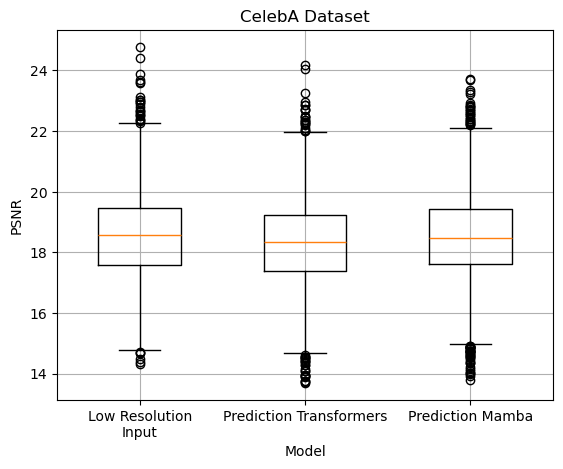

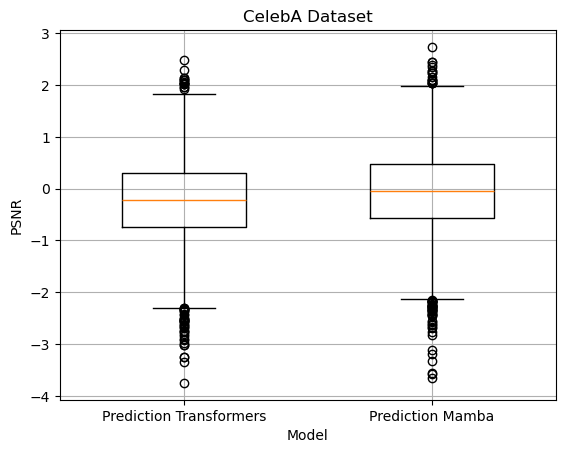

In [13]:
fig, ax = plt.subplots()
ax.boxplot([a,a1,b1], widths= 0.5,labels = ['Low Resolution\nInput','Prediction Transformers','Prediction Mamba']);
ax.set_xlabel("Model")
ax.set_ylabel("PSNR")
ax.title.set_text(f"CelebA Dataset")
ax.grid()
plt.show()
fig, ax = plt.subplots()
ax.boxplot([a1-a, b1-a], widths= 0.5, labels = ['Prediction Transformers','Prediction Mamba']);
ax.set_xlabel("Model")
ax.set_ylabel("PSNR")
ax.title.set_text(f"CelebA Dataset")
ax.grid()
plt.show()

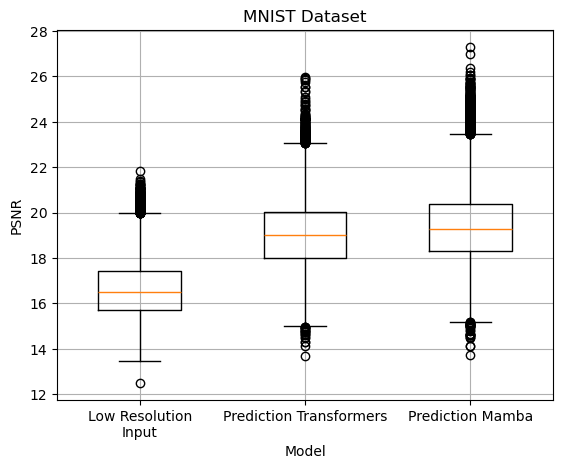

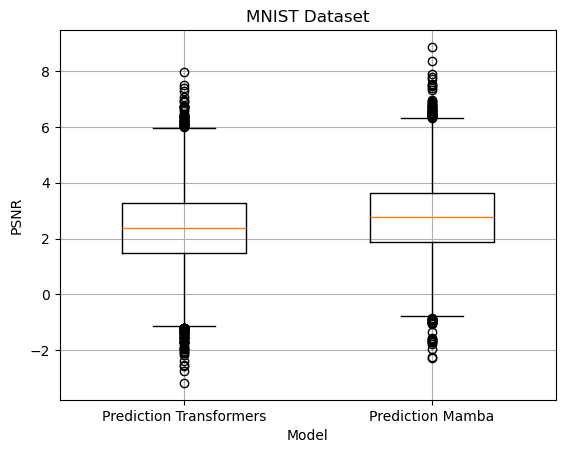

In [10]:
# MNIST
a = torch.load('/group/jug/Aman/Inference/fast/11-52-23/sum/MNIST/5/05_06-11_25_29/fast_lowres.pt').cpu()
a1 = torch.load('/group/jug/Aman/Inference/fast/11-52-23/sum/MNIST/5/05_06-11_25_29/fast_pred.pt').cpu()
b = torch.load('/group/jug/Aman/Inference/mamba/14-29-16/sum/MNIST/5/05_06-11_49_44/mamba_lowres.pt').cpu()
b1 = torch.load('/group/jug/Aman/Inference/mamba/14-29-16/sum/MNIST/5/05_06-11_49_44/mamba_pred.pt').cpu()

fig, ax = plt.subplots()
ax.boxplot([a,a1,b1], widths= 0.5, labels = ['Low Resolution\nInput','Prediction Transformers','Prediction Mamba']);
ax.set_xlabel("Model")
ax.set_ylabel("PSNR")
ax.title.set_text(f"MNIST Dataset")
ax.grid()
plt.show()
fig, ax = plt.subplots()
ax.boxplot([a1-a, b1-a], widths= 0.5, labels = ['Prediction Transformers','Prediction Mamba']);
ax.set_xlabel("Model")
ax.set_ylabel("PSNR")
ax.title.set_text(f"MNIST Dataset")
ax.grid()
plt.show()

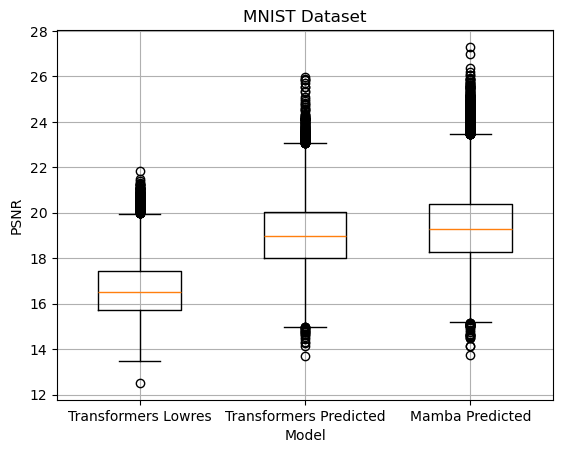

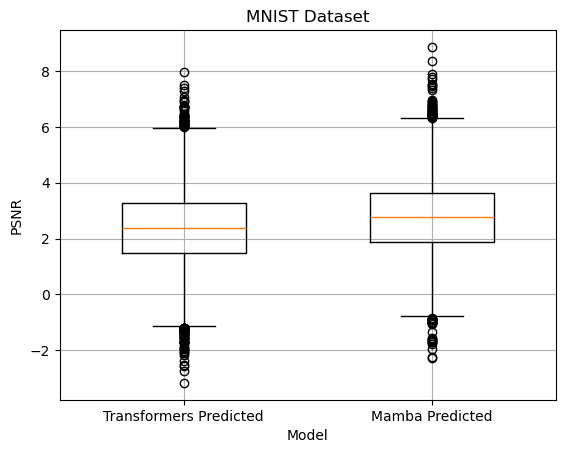

In [11]:
fig, ax = plt.subplots()
ax.boxplot([a,a1, b1], widths= 0.5, labels = ['Transformers Lowres','Transformers Predicted','Mamba Predicted']);
ax.set_xlabel("Model")
ax.set_ylabel("PSNR")
ax.title.set_text(f"MNIST Dataset")
ax.grid()
plt.show()
fig, ax = plt.subplots()
ax.boxplot([a1-a, b1-a], widths= 0.5, labels = ['Transformers Predicted','Mamba Predicted']);
ax.set_xlabel("Model")
ax.set_ylabel("PSNR")
ax.title.set_text(f"MNIST Dataset")
ax.grid()
plt.show()

In [ ]:
def predict_one_test_batch(no_of_images = 5, fwd = True):
    i = 0
    for fc, (mag_min, mag_max) in dm.test_dataloader():
        break
        i+=1
        if i ==12:
            break

    fc = fc.to('cuda')
    mag_min = mag_min.to('cuda')
    mag_max = mag_max.to('cuda')
    fc = fc[:, model.dst_flatten_order]
    x_input = fc.clone()


    with torch.no_grad():
        if fwd:
            # pred = model.sres.forward(x_input)
            pass
        else:
            pred = model.sres.forward_i(x_input)
        fc_loss, amp_loss, phi_loss,weighted_phi_loss = model.criterion(pred, fc, mag_min, mag_max)
        print(f'fc_loss: {fc_loss}, amp_loss: {amp_loss}, phi_loss: {phi_loss}, weighted_phi_loss: {weighted_phi_loss}')
    fig = plt.figure()
    lowres = x_input.clone()
    lowres[:, model.input_seq_length:] = 0
    # lowres[:] = 0
    pred_img = model.convert2img(fc=pred, mag_min=mag_min, mag_max=mag_max)
    lowres_img = model.convert2img(fc=lowres, mag_min=mag_min, mag_max=mag_max)
    gt_img = model.convert2img(fc=fc, mag_min=mag_min, mag_max=mag_max)


    lowres_psnr = PSNR(gt_img,lowres_img)
    pred_psnr = PSNR(gt_img,pred_img)
    gt_psnr = PSNR(gt_img,gt_img)

    sns.histplot(pred_psnr.cpu().detach() - lowres_psnr.cpu().detach(), kde=True, color='green', legend= True )
    # fig.legend()
    plt.savefig('psnr_diff.png')
    plt.close()
    for i in [pred_img, lowres_img, gt_img]:
        i.cpu().detach().numpy()
    for sample in range(no_of_images):
        fig2 = plt.figure(figsize=(31/2., 10/2.))
        gs = gridspec.GridSpec(1,5, width_ratios=[10,0.5, 10, 0.5, 10])
        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)

        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        ax0.imshow(lowres_img[sample].cpu(), cmap='gray')
        ax0.set_title('Low-Resolution Input');
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(pred_img[sample].cpu(), cmap='gray')
        ax1.set_title('Prediction');
        ax1.axis('equal');


        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(gt_img[sample].cpu(), cmap='gray')
        ax2.set_title('Ground Truth');
        ax2.axis('equal');


    for i in range(no_of_images):
        sample = i
        fig = plt.figure(figsize=(31/2., 10/2.))
        gs = gridspec.GridSpec(1, 5, width_ratios=[10,0.5, 10, 0.5, 10])
        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');

predict_one_test_batch(5, fwd=False)
# predict_one_test_batch(5, fwd=True)